# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

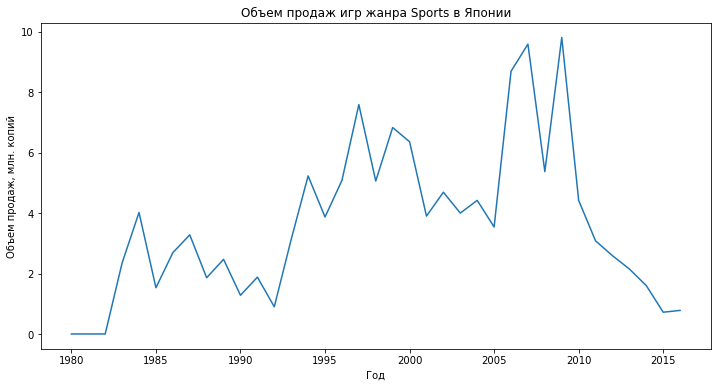

In [3]:
data = df[df["Genre"]=="Sports"][["Year", "JP_Sales"]].groupby("Year").sum()

fig, axes = plt.subplots(figsize=(12, 6))
axes.set_title("Объем продаж игр жанра Sports в Японии")
axes.set_xlabel("Год")
axes.set_ylabel("Объем продаж, млн. копий")
axes.plot(data.index, data["JP_Sales"])

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

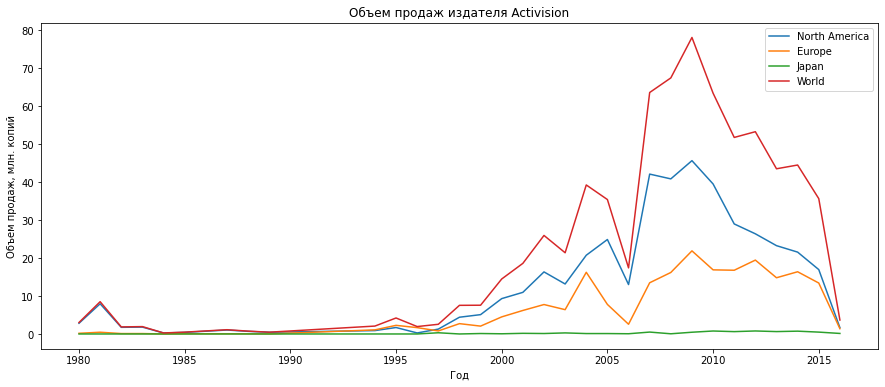

In [4]:
data = df[df["Publisher"] == "Activision"][["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]].groupby("Year").sum()

fig, axes = plt.subplots(figsize=(15, 6))
axes.plot(data.index, data["NA_Sales"], label="North America")
axes.plot(data.index, data["EU_Sales"], label="Europe")
axes.plot(data.index, data["JP_Sales"], label="Japan")
axes.plot(data.index, data["Global_Sales"], label="World")

axes.set_title("Объем продаж издателя Activision")
axes.set_xlabel("Год")
axes.set_ylabel("Объем продаж, млн. копий")
axes.legend()
plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

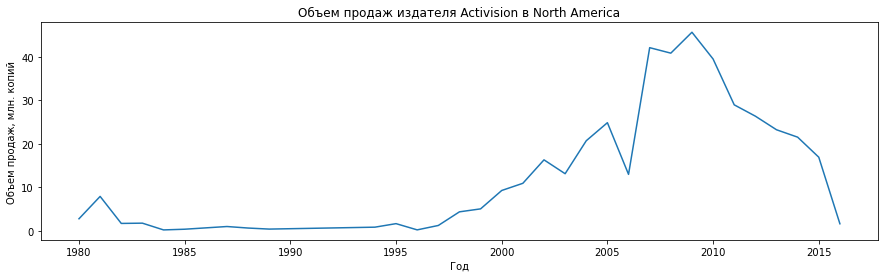

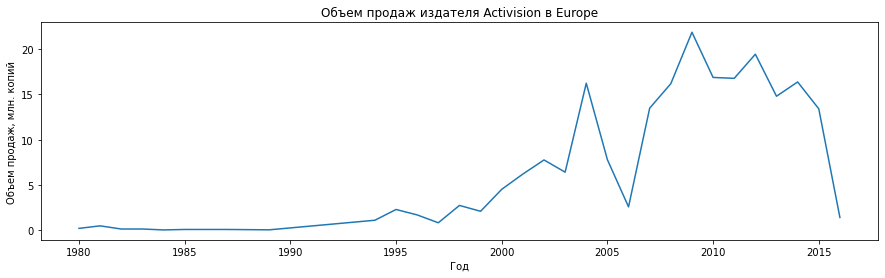

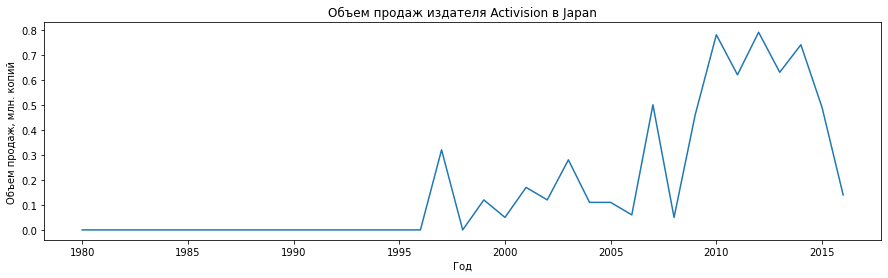

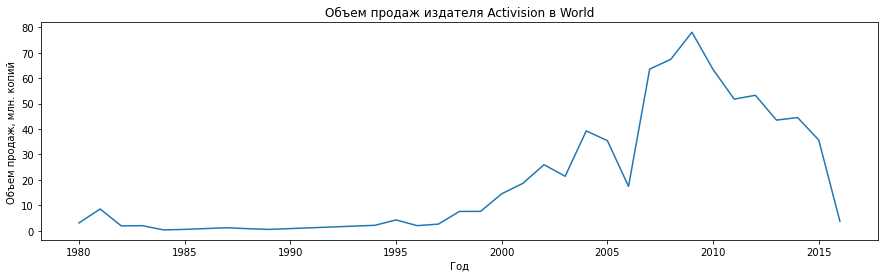

In [5]:
areas={
    "NA_Sales": "North America",
    "EU_Sales": "Europe",
    "JP_Sales": "Japan",
    "Global_Sales": "World"
}
fields = ["Year"] + list(areas.keys())
data = df[df["Publisher"] == "Activision"][fields].groupby("Year").sum()

for area, name in areas.items():
    fig, axes = plt.subplots(figsize=(15, 4))
    axes.plot(data.index, data[area])

    axes.set_title(f"Объем продаж издателя Activision в {name}")
    axes.set_xlabel("Год")
    axes.set_ylabel("Объем продаж, млн. копий")
plt.show()

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

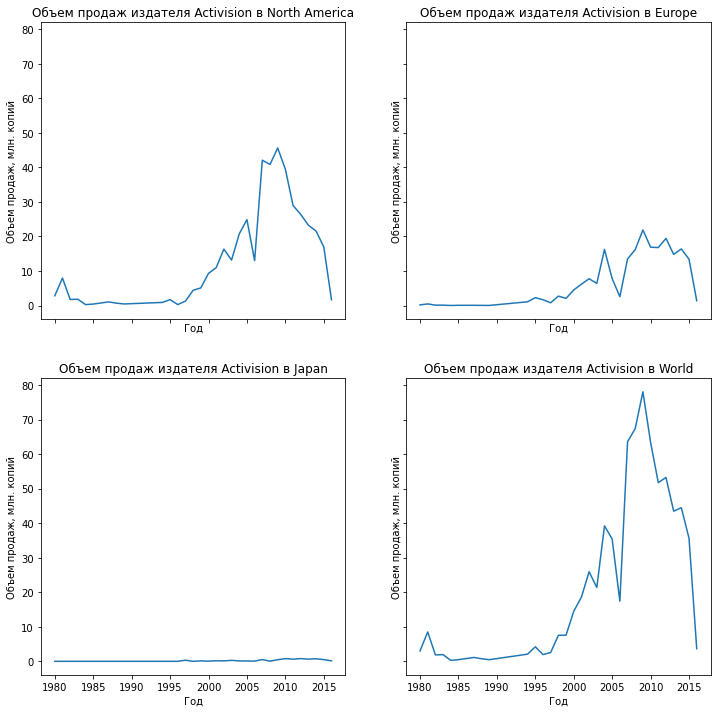

In [45]:
areas={
    "NA_Sales": ("North America", 0, 0),
    "EU_Sales": ("Europe", 0, 1),
    "JP_Sales": ("Japan", 1, 0),
    "Global_Sales": ("World", 1, 1)
}
fields = ["Year"] + list(areas.keys())
data = df[df["Publisher"] == "Activision"][fields].groupby("Year").sum()

fig, axes_arr = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)

for area, params in areas.items():
    name, row, col = params
    axes = axes_arr[row][col]
    axes.plot(data.index, data[area])
    axes.set_title(f"Объем продаж издателя Activision в {name}")
    axes.set_xlabel("Год")
    axes.set_ylabel("Объем продаж, млн. копий")
plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

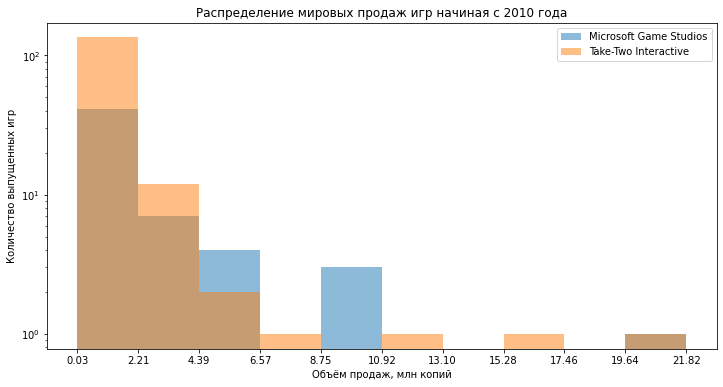

In [7]:
publishers = ["Microsoft Game Studios", "Take-Two Interactive"]

fig, axes = plt.subplots(figsize=(12, 6))
axes.set_yscale("log")

bins = None
for publisher in publishers:
    data = df[(df["Publisher"]==publisher) & (df["Year"]>=2010)][["Global_Sales"]]
    _, bins, _ = axes.hist(data, alpha=0.5, label=publisher, bins=bins if bins is not None else 10)
    
axes.set_title("Распределение мировых продаж игр начиная с 2010 года")
axes.set_xlabel("Объём продаж, млн копий")
axes.set_ylabel("Количество выпущенных игр")
axes.set_xticks(bins)
axes.legend()
plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

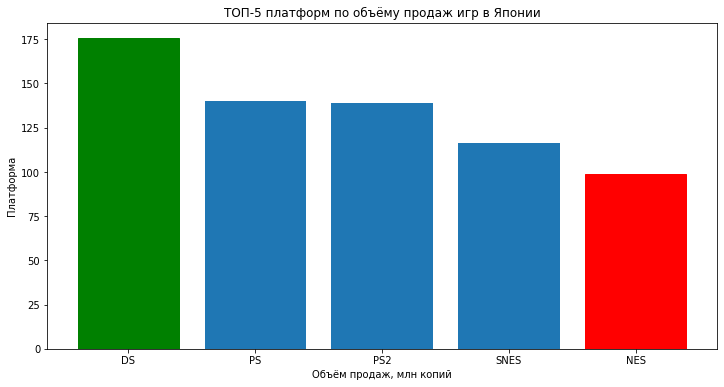

In [44]:
data = df[["Platform", "JP_Sales"]].groupby("Platform").sum().sort_values("JP_Sales", ascending=False).head(5)

fix, axes = plt.subplots(figsize=(12, 6))
bar = axes.bar(data.index, data["JP_Sales"])
# Так как в процессе подготовки данных они оказались отсортированы, мы знаем заранее
# где наибольший и где наименьший столбец
bar.patches[0].set_color("Green")
bar.patches[-1].set_color("Red")

axes.set_title("ТОП-5 платформ по объёму продаж игр в Японии")
axes.set_xlabel("Объём продаж, млн копий")
axes.set_ylabel("Платформа")

plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

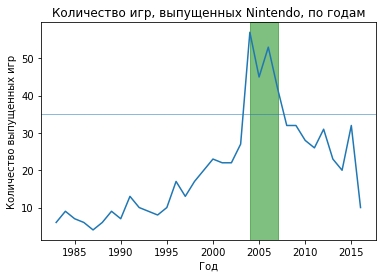

In [114]:
data = df[df["Publisher"]=="Nintendo"][["Year", "Name"]].groupby("Year").count().reset_index()
data.rename(columns={"Name": "Total"}, inplace=True)
data["Highlight"] = data["Total"] > 30

fix, axes = plt.subplots()
axes.plot(data["Year"], data["Total"])
axes.set_title("Количество игр, выпущенных Nintendo, по годам")
axes.set_xlabel("Год")
axes.set_ylabel("Количество выпущенных игр")


axes.axhline(35, linewidth=0.5)

highlighted_years = data[data["Total"] > 35]["Year"]
axes.axvspan(xmin=highlighted_years.min(),
             xmax=highlighted_years.max(),
             color="Green", alpha=0.5)

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

In [10]:
### YOUR CODE HERE ###
